# House Prices: Advanced Regression Techniques:

## EDA, Feature Selection, & Feature Engineering

- Eric Meyers

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Import libraries, set display options, and import cleaned/imputed raw data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
ames = pd.read_csv('./train_imputed.csv', index_col = 0)

In [4]:
ames.sample(15)

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
832          160       FV    30.000000     3180   Pave      Pave      Reg         Lvl    Inside       Gtl      Somerst       Norm       Norm   TwnhsE     2Story            7            5       2005          2005     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA      PConc       Gd       TA           No          Unf           0          Unf           0        600    GasA        Ex          Y      SBrkr       520       600            80       1200             0             0         2         1             2             1          Gd             4        Typ           0       No_FP     Detchd       2005.0          RFn           2         480         TA         TA          Y           0          166              0          0            0         0  No_Pool  No_Fence       No_MF        0       6    2006       WD        Normal     151000
1345          60       RL    85.000000    11103   Pave  No_Alley      IR1         Lvl    Corner       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2006          2006     Gable  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc       Gd       TA           No          Unf           0          Unf           0        728    GasA        Ex          Y      SBrkr       728       728             0       1456             0             0         2         1             3             1          Gd             8        Typ           1          TA     Attchd       2006.0          Fin           2         440         TA         TA          Y           0            0              0          0            0         0  No_Pool  No_Fence       No_MF        0       7    2007      New       Partial     155835
6             50       RL    85.000000    14115   Pave  No_Alley      IR1         Lvl    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin            5            5       1993          1995     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA       Wood       Gd       TA           No          GLQ         732          Unf           0         64    GasA        Ex          Y      SBrkr       796       566             0       1

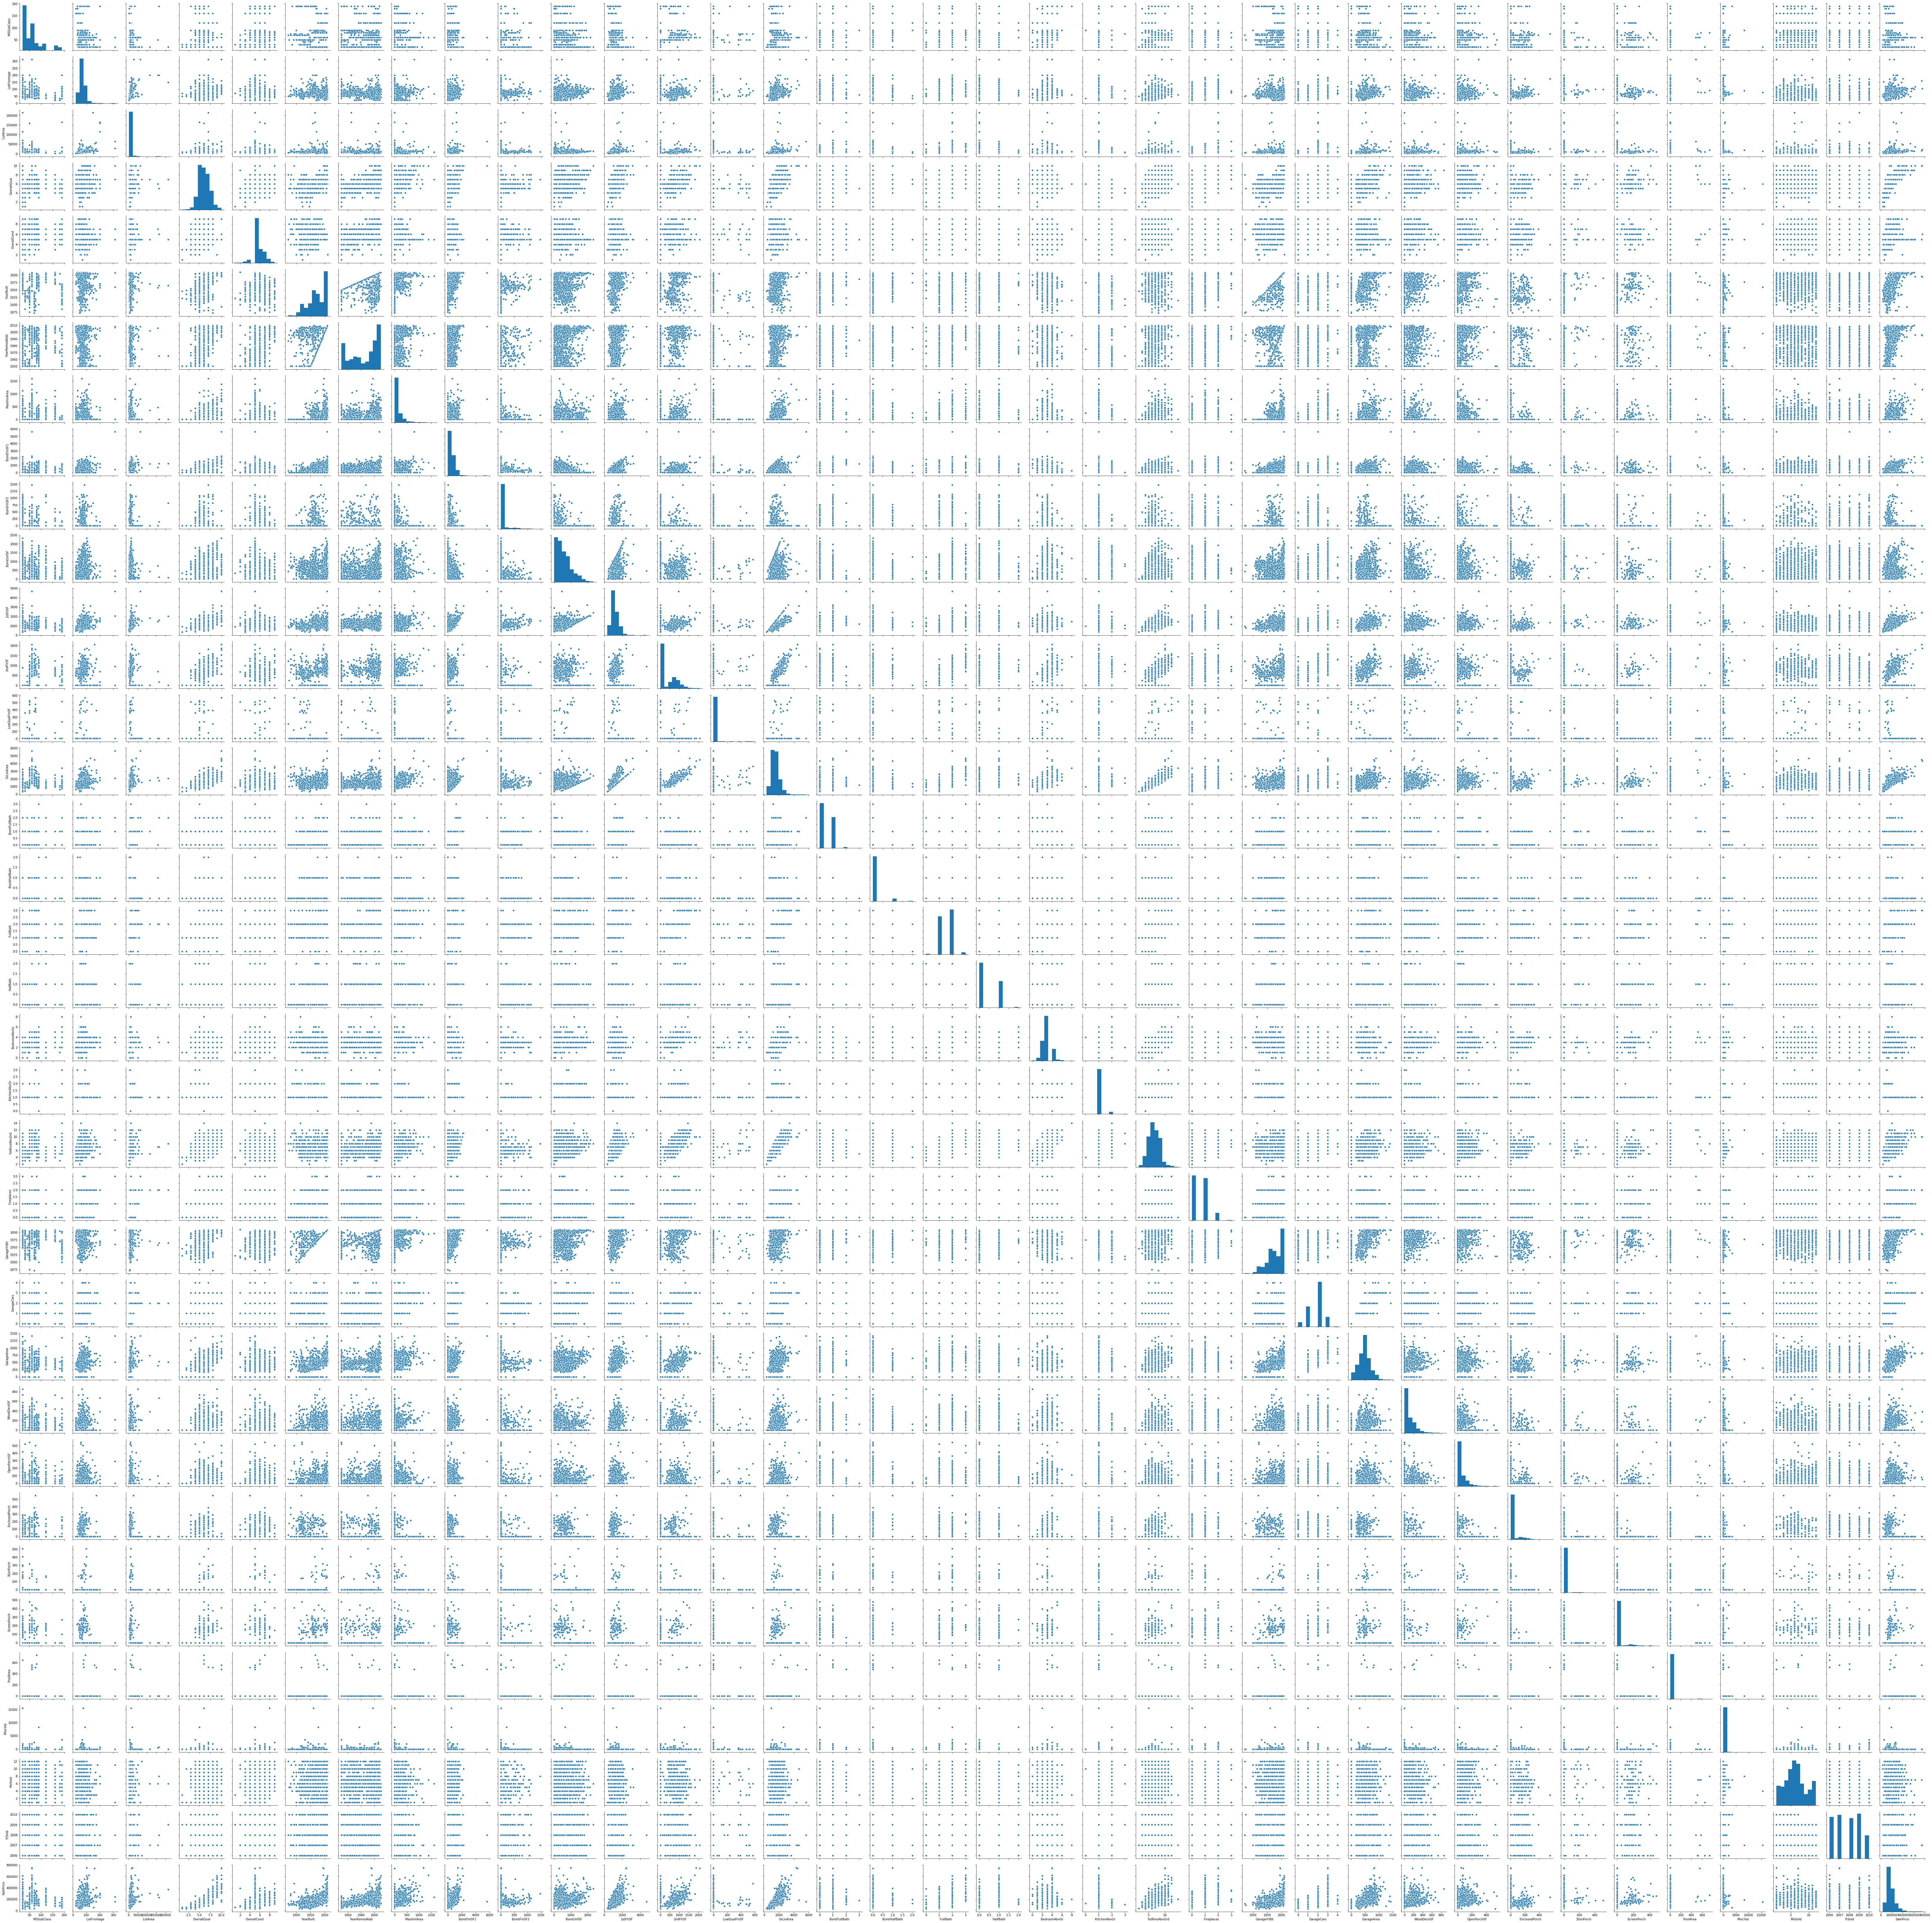

In [5]:
sns.pairplot(ames) #WARNING DO NOT RUN THIS CELL: WILL RENDER SLOWLY

### Target: SalePrice

Let's learn more about our target variable: SalePrice, and check its distribution. Do we need to transform?

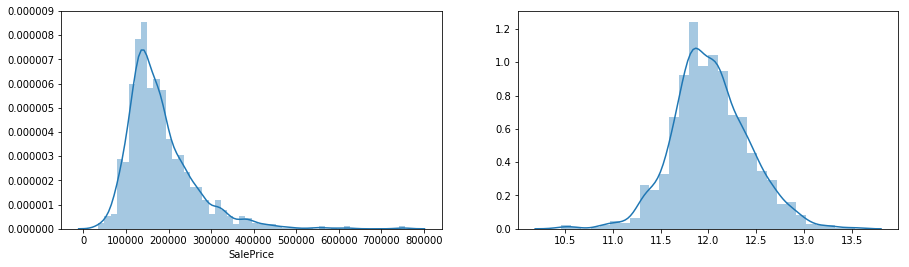

In [5]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.distplot(ames.SalePrice, bins = 50)

y = np.array(ames.SalePrice)
y_trans = np.log1p(y)

plt.subplot(1,2,2)
sns.distplot(y_trans, bins = 30)

Observation: SalePrice is distributed with a right-skew. We normalize the distribution with a transformation of log1p (i.e. log(1 + x)).

In [6]:
ames.SalePrice.describe() #stats reflecting right skew. Also note: min = $35k, max = $755k.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### SalePrice and relationship vs. Features

Let's look at correlation first, then plot some highly-correlated features to understand their relationships.

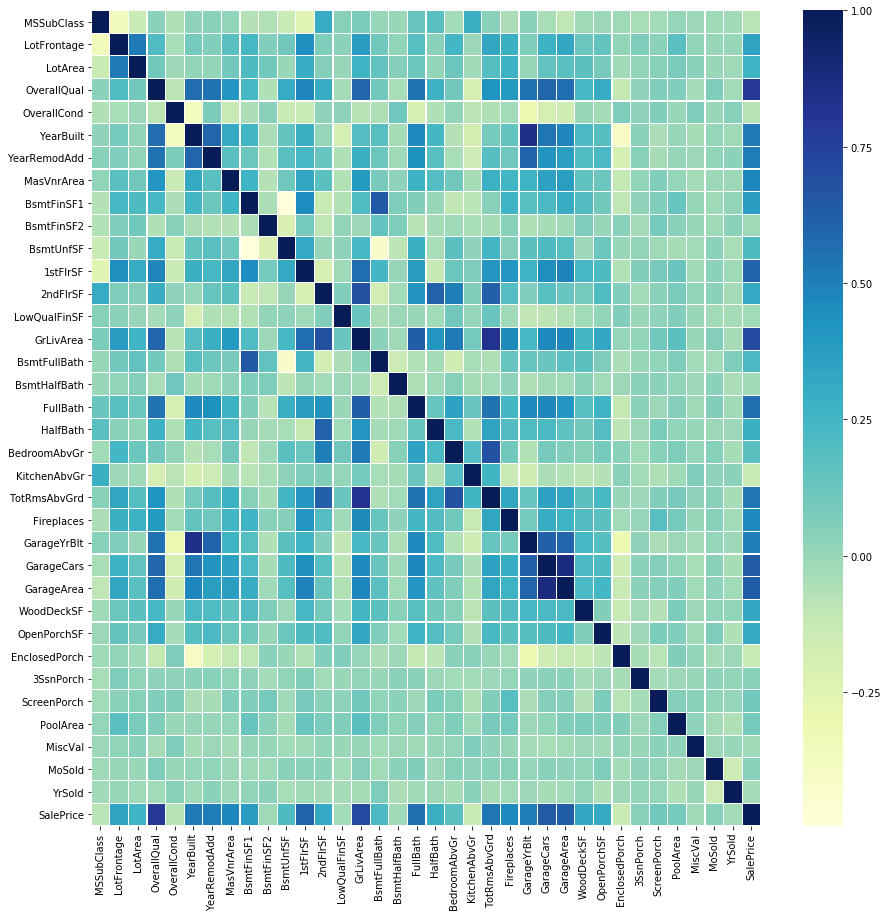

In [7]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

In [8]:
ames_corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.352415 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.023573   -0.069836   -0.065649  -0.140759 -0.251758  0.307886      0.046474   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.039567   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037  -0.043825    -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284
LotFrontage     -0.352415     1.000000  0.519923     0.206218    -0.040530   0.095011      0.063455    0.178459    0.236128    0.061539   0.102661  0.440357  0.066882      0.031727   0.382460      0.109815      0.023464  0.186813  0.037903      0.240957     -0.004911      0.324583    0.282029     0.066467    0.271205    0.326464    0.118315     0.146816       0.014573   0.069569     0.031934  0.176750  0.022255  0.001806  0.003066   0.342592
LotArea         -0.139781     0.519923  1.000000     0.105806    -0.005636   0.014228      0.013788    0.103321    0.214103    0.111170  -0.002618  0.299475  0.050986      0.004779   0.263116      0.158155      0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015    0.271364     0.003669    0.154871    0.180403    0.171698     0.084774      -0.018340   0.020423     0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843
OverallQual      0.032628     0.206218  0.105806     1.000000    -0.091932   0.572323      0.550684    0.407252    0.239666   -0.059119   0.308159  0.476224  0.295493     -0.030429   0.593007      0.111098     -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452    0.396765     0.555022    0.600671    0.562022    0.238923     0.308819      -0.113937   0.030371     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982
OverallCond     -0.059316    -0.040530 -0.005636    -0.091932     1.000000  -0.375983      0.073741   -0.125694   -0.046231    0.040229  -0.136841 -0.144203  0.028942      0.025494  -0.079686     -0.054942      0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583   -0.023820    -0.296887   -0.185758   -0.151521   -0.003334    -0.032589       0.070356   0.025504     0.054811 -0.001985  0.068777 -0.003511  0.043950  -0.077856
YearBuilt        0.027850     0.095011  0.014228     0.572323    -0.375983   1.000000      0.592855    0.311600    0.249503   -0.049107   0.149040  0.281986  0.010308     -0.183784   0.199010      0.187599     -0.038162  0.468271  0.242656     -0.070651     -0.174800      0.095589    0.147716     0.845141    0.537850    0.478954    0.224880     0.188686      -0.387268   0.031355    -0.050364  0.004950 -0.034383  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581     0.063455  0.013788     0.550684     0.073741   0.592855      1.000000    0.176529    0.128451   -0.067759   0.181133  0.240379  0.140024     -0.062419   0.287389      0.119470     -0.012337  0.439046  0.183331     -0.040581     -0.149598      0.191740    0.112581     0.604353    0.420622    0.371600    0.205726     0.226298      -0.193919   0.045286    -0.038740  0.005829 -0.010286  0.021490  0.035743   0.507101
MasVnrArea       0.023573     0.178459  0.103321     0.407252    -0.125694   0.311600      0.176529    1.000000    0.261256   -0.071330   0.113862  0.339850  0.173800     -0.068628   0.388052      0.083010      0.027403  0.272999  0.199108      0.102775     -0.038450      0.279568    0.247015     0.267224    0.361945    0.370884    0.159991     0.122528      -0.109907   0.019144     0.062248  0.011928 -0.029512 -0.006723 -0.008317   0.472614
B

In [9]:
ames_corr.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.342592
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Note: some strong correlations to SalePrice:
- OverallQual (79%)
- TotalBsmtSF (61%)
- 1stFlrSF (61%)
- GrLivArea (71%
- GarageCars (64%)
- GarageArea (62%)

Now let's see what transforming SalePrice with normalized log1p does to correlation relationships:

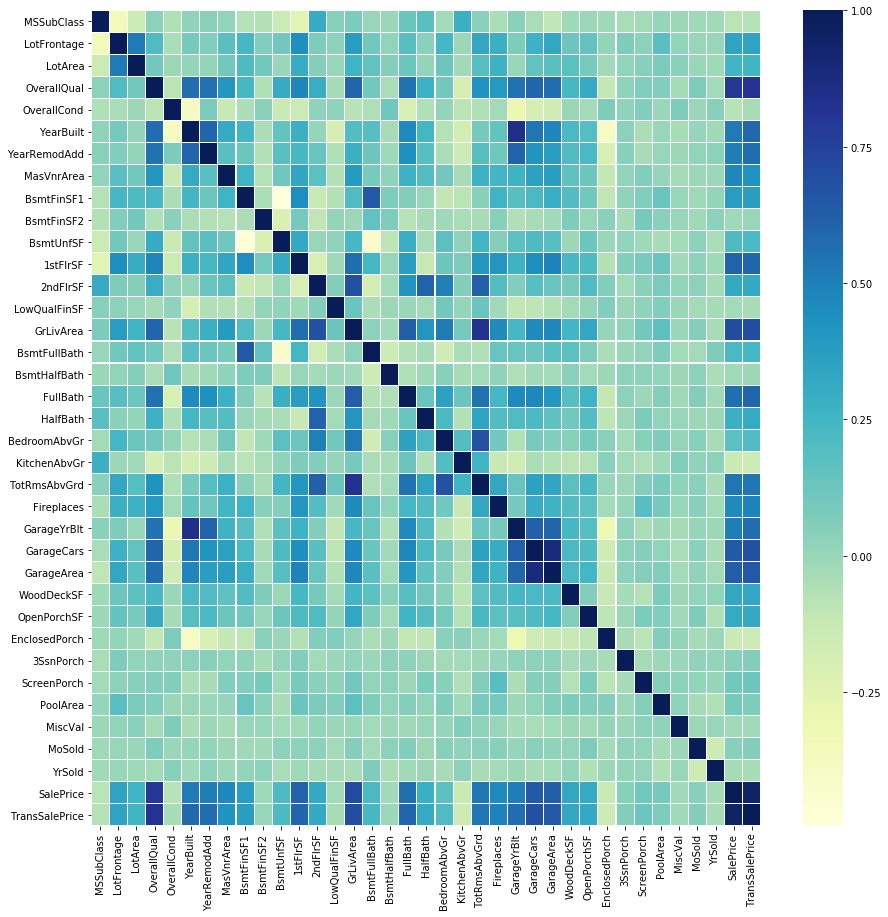

In [10]:
ames['TransSalePrice'] = y_trans

plt.subplots(figsize = (15, 15))
ames_corr2 = ames.corr()
msk = np.zeros_like(ames_corr2, dtype=np.bool)
sns.heatmap(ames_corr2, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

In [11]:
ames_corr2

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  TransSalePrice
MSSubClass        1.000000    -0.352415 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.023573   -0.069836   -0.065649  -0.140759 -0.251758  0.307886      0.046474   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.039567   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037  -0.043825    -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284       -0.073959
LotFrontage      -0.352415     1.000000  0.519923     0.206218    -0.040530   0.095011      0.063455    0.178459    0.236128    0.061539   0.102661  0.440357  0.066882      0.031727   0.382460      0.109815      0.023464  0.186813  0.037903      0.240957     -0.004911      0.324583    0.282029     0.066467    0.271205    0.326464    0.118315     0.146816       0.014573   0.069569     0.031934  0.176750  0.022255  0.001806  0.003066   0.342592        0.349040
LotArea          -0.139781     0.519923  1.000000     0.105806    -0.005636   0.014228      0.013788    0.103321    0.214103    0.111170  -0.002618  0.299475  0.050986      0.004779   0.263116      0.158155      0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015    0.271364     0.003669    0.154871    0.180403    0.171698     0.084774      -0.018340   0.020423     0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843        0.257320
OverallQual       0.032628     0.206218  0.105806     1.000000    -0.091932   0.572323      0.550684    0.407252    0.239666   -0.059119   0.308159  0.476224  0.295493     -0.030429   0.593007      0.111098     -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452    0.396765     0.555022    0.600671    0.562022    0.238923     0.308819      -0.113937   0.030371     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982        0.817185
OverallCond      -0.059316    -0.040530 -0.005636    -0.091932     1.000000  -0.375983      0.073741   -0.125694   -0.046231    0.040229  -0.136841 -0.144203  0.028942      0.025494  -0.079686     -0.054942      0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583   -0.023820    -0.296887   -0.185758   -0.151521   -0.003334    -0.032589       0.070356   0.025504     0.054811 -0.001985  0.068777 -0.003511  0.043950  -0.077856       -0.036868
YearBuilt         0.027850     0.095011  0.014228     0.572323    -0.375983   1.000000      0.592855    0.311600    0.249503   -0.049107   0.149040  0.281986  0.010308     -0.183784   0.199010      0.187599     -0.038162  0.468271  0.242656     -0.070651     -0.174800      0.095589    0.147716     0.845141    0.537850    0.478954    0.224880     0.188686      -0.387268   0.031355    -0.050364  0.004950 -0.034383  0.012398 -0.013618   0.522897        0.586570
YearRemodAdd      0.040581     0.063455  0.013788     0.550684     0.073741   0.592855      1.000000    0.176529    0.128451   -0.067759   0.181133  0.240379  0.140024     -0.062419   0.287389      0.119470     -0.012337  0.439046  0.183331     -0.040581     -0.149598      0.191740    0.112581     0.604353    0.420622    0.371600    0.205726     0.226298      -0.193919   0.045286    -0.038740  0.005829 -0.010286  0.021490  0.035743   0.507101        0.565608
MasVnrArea        0.023573     0.178459  0.103321     0.407252    -0.125694   0.311600      0.176529    1.000000    0.261256   -0.071330   0.113862  0.339850  0.173800     -0.068628   0.388052      0.083010      0.027403  0.272999  0.199108      0.102775     -0.038450      0.279568    0.247015     0.267224    0

In [12]:
ames_corr2.TransSalePrice.sort_values(ascending=False)

TransSalePrice    1.000000
SalePrice         0.948374
OverallQual       0.817185
GrLivArea         0.700927
GarageCars        0.680625
GarageArea        0.650888
1stFlrSF          0.596981
FullBath          0.594771
YearBuilt         0.586570
GarageYrBlt       0.568696
YearRemodAdd      0.565608
TotRmsAbvGrd      0.534422
Fireplaces        0.489450
MasVnrArea        0.426776
BsmtFinSF1        0.372023
LotFrontage       0.349040
WoodDeckSF        0.334135
OpenPorchSF       0.321053
2ndFlrSF          0.319300
HalfBath          0.313982
LotArea           0.257320
BsmtFullBath      0.236224
BsmtUnfSF         0.221985
BedroomAbvGr      0.209043
ScreenPorch       0.121208
PoolArea          0.069798
MoSold            0.057330
3SsnPorch         0.054900
BsmtFinSF2        0.004832
BsmtHalfBath     -0.005149
MiscVal          -0.020021
OverallCond      -0.036868
YrSold           -0.037263
LowQualFinSF     -0.037963
MSSubClass       -0.073959
KitchenAbvGr     -0.147548
EnclosedPorch    -0.149050
N

Results: By transforming SalePrice 5 out of our 6 most-correlated features have increased by 1% to 3%.

Now let's plot these 6-most correlated features against SalePrice AND transformed SalePrice:

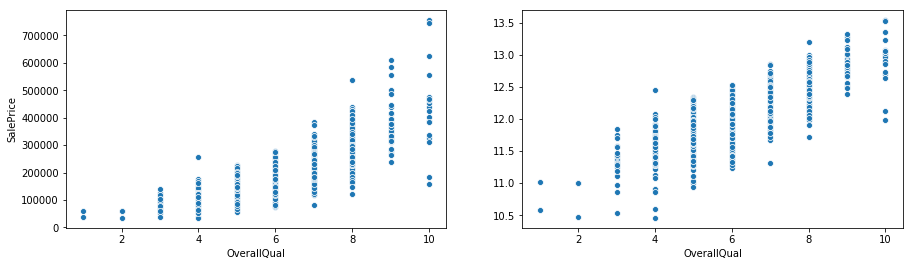

In [13]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'OverallQual', y = y, data = ames)
plt.ylabel('SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(x = 'OverallQual', y = y_trans, data = ames)

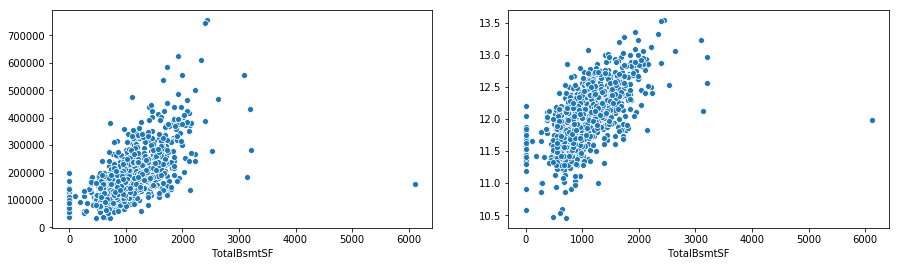

In [41]:
ames['TotalBsmtSF'] = ames['BsmtFinSF1'] + ames['BsmtFinSF2'] + ames['BsmtUnfSF']

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'TotalBsmtSF', y = y, data = ames)
plt.subplot(1,2,2)
sns.scatterplot(x = 'TotalBsmtSF', y = y_trans, data = ames)

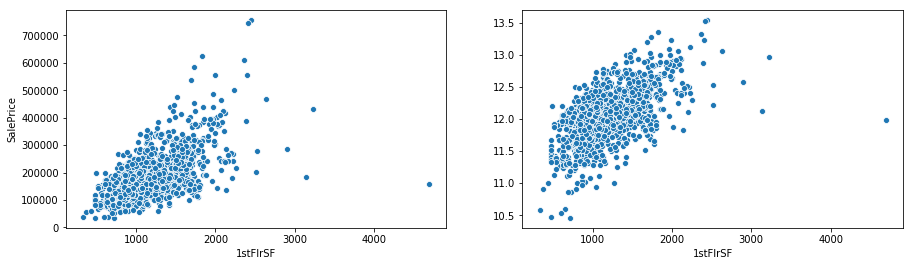

In [42]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = '1stFlrSF', y = y, data = ames)
plt.ylabel('SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(x = '1stFlrSF', y = y_trans, data = ames)

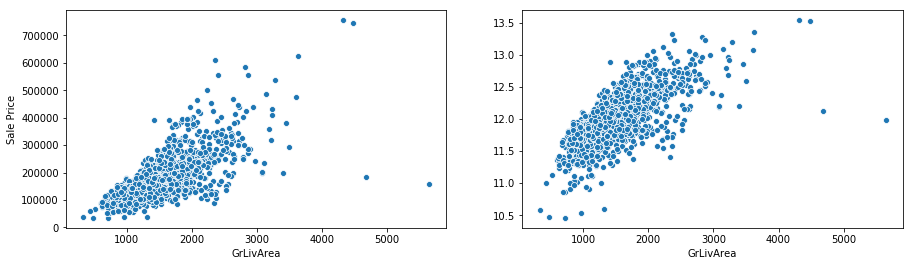

In [43]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'GrLivArea', y = y, data = ames)
plt.ylabel('Sale Price')
plt.subplot(1,2,2)
sns.scatterplot(x = 'GrLivArea', y = y_trans, data = ames)

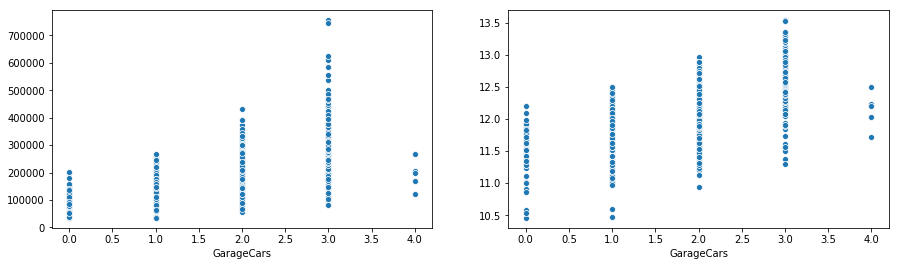

In [44]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'GarageCars', y = y, data = ames)
plt.subplot(1,2,2)
sns.scatterplot(x = 'GarageCars', y = y_trans, data = ames)

<Figure size 432x288 with 0 Axes>

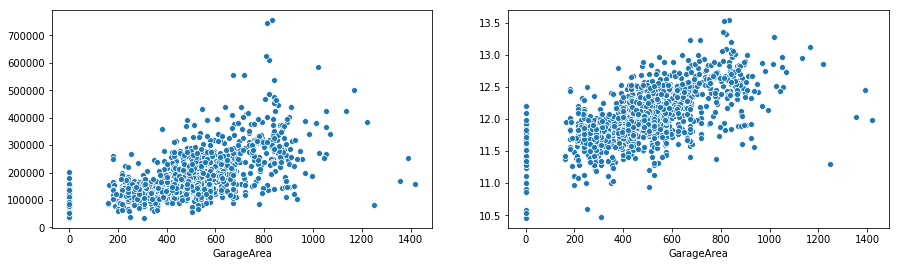

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'GarageArea', y = y, data = ames)
plt.subplot(1,2,2)
sns.scatterplot(x = 'GarageArea', y = y_trans, data = ames)
plt.figure()

### Other strongly correlated features:
- 1stFlrSF vs. TotalBsmtSF
- 2ndFlrSF vs. GrLivArea
- TotRmsAbvGrd vs. GrLivArea
- GarageYrBlt vs. YearBuilt
- GarageArea vs. GarageCars

Plot these relationships:

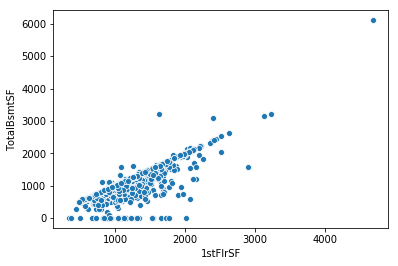

In [46]:
sns.scatterplot(x = '1stFlrSF', y = 'TotalBsmtSF', data = ames)

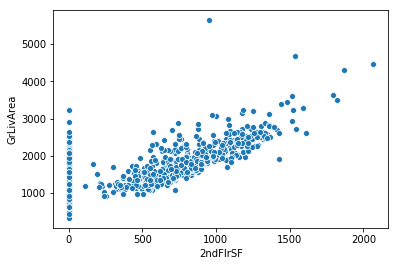

In [47]:
sns.scatterplot(x = '2ndFlrSF', y = 'GrLivArea', data = ames) #makes sense bc 2ndFlrSF is part of GrLivArea

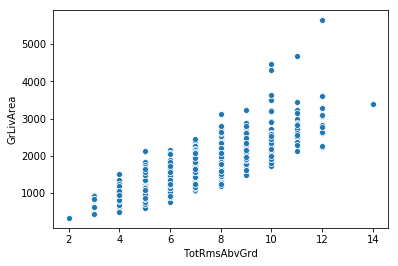

In [48]:
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'GrLivArea', data = ames)

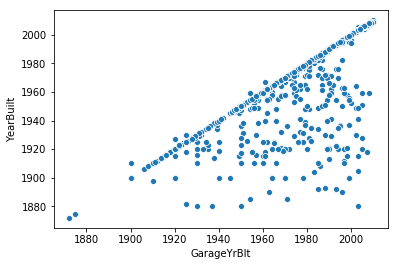

In [49]:
sns.scatterplot(x = 'GarageYrBlt', y = 'YearBuilt', data = ames) #This is as expected.

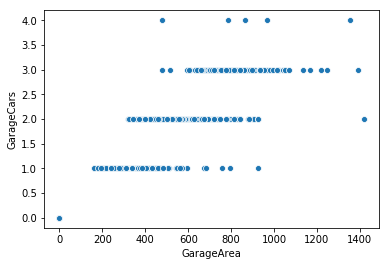

In [50]:
sns.scatterplot(x = 'GarageArea', y = 'GarageCars', data = ames) #Also as expected

Observations:
- GrLivArea seems to have a strong relationship with target price, TotRmsAbvGrd, AND 2ndFlrSF
- TotalSF is missing as a feature while individual SF's seem to have some strong relationships.
- Year Built vs. Garage Year Built & GarageCars vs. GarageArea have an expectedly strong relationship.

### Ordinal Features

The following features have a quality or condition rating. But this is useless in regression unless we can enumerate them.
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- Functional
- FireplaceQu
- GarageQual
- GarageCond
- PoolQC
- Fence

Let's convert!

In [51]:
ames.ExterQual = ames.ExterQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [52]:
ames.ExterCond = ames.ExterCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [53]:
ames.BsmtQual = ames.BsmtQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_BQ', 0)

In [54]:
ames.BsmtCond = ames.BsmtCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_BC', 0)

In [55]:
ames.BsmtExposure = ames.BsmtExposure.replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('No_BE', 0)

In [56]:
ames.BsmtFinType1 = ames.BsmtFinType1.replace('GLQ', 6).replace('ALQ',5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('No_BFT1', 0)

In [57]:
ames.BsmtFinType2 = ames.BsmtFinType2.replace('GLQ', 6).replace('ALQ',5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('No_BFT2', 0)

In [58]:
ames.HeatingQC = ames.HeatingQC.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [59]:
ames.KitchenQual = ames.KitchenQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [60]:
ames.Functional = ames.Functional.replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Min1', 3).replace('Min2', 2).replace('Sev', 1).replace('Sal', 0)

In [61]:
ames.FireplaceQu = ames.FireplaceQu.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_FP', 0)

In [62]:
ames.GarageQual = ames.GarageQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_GQ', 0)

In [63]:
ames.GarageCond = ames.GarageCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_GC', 0)

In [64]:
ames.PoolQC = ames.PoolQC.replace('Ex', 3).replace('Gd', 2).replace('Fa', 1).replace('No_Pool', 0)

In [65]:
ames.Fence = ames.Fence.replace('GdPrv', 4).replace('MnPrv', 3).replace('GdWo', 2).replace('MnWw', 1).replace('No_Fence', 0)

Now let's re-correlate to see if we picked up any new strong relationships:

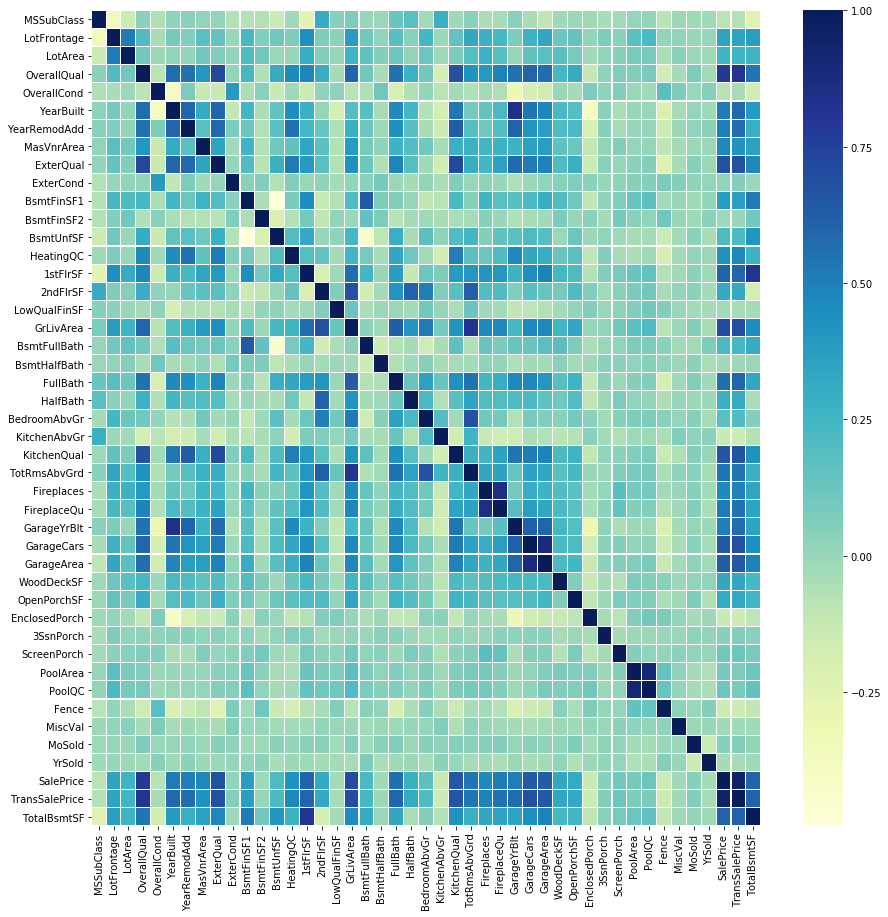

In [66]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

Observation:
Nothing alarmingly new. There seems to be opportunities to combine like-fields, let's create some features.

### Feature Engineering:

Based on the above EDA, we'll try creating new features derived from combinations of others and see how they relate.
Methodology: Sum square footage metrics to create aggregated SF metrics and multiply Quality/Condition metrics to combine in a relative-magnitude format.
+ InsideSF
+ OutsideSF
+ TotalSF
+ OverallQualCond
+ GarageCarArea
+ ExterQualCond
+ BsmtQualCond
+ BsmtQualCondPlus
+ FireplacesQu
+ GarageQualCond


+ AND add Transformed SalePrice

In [67]:
ames['InsideSF'] = ames['TotalBsmtSF'] + ames['GrLivArea'] + ames['GarageArea'] + ames['EnclosedPorch']

In [68]:
ames['OutsideSF'] = ames['WoodDeckSF'] + ames['OpenPorchSF'] + ames['PoolArea']

In [69]:
ames['TotalSF'] = ames['InsideSF'] + ames['OutsideSF']

In [70]:
ames['OverallQualCond'] = ames['OverallQual'] * ames['OverallCond']

In [71]:
ames['GarageCarArea'] = ames['GarageCars'] * ames['GarageArea']

In [72]:
ames['ExterQualCond'] = ames['ExterQual'] * ames['ExterCond']

In [76]:
#ames['BsmtQualCond'] = ames['BsmtQual'] * ames['BsmtCond']

In [78]:
#ames['BsmtQualCondPlus'] = ames['BsmtQual'] * ames['BsmtCond'] * ames['BsmtExposure'] * ames['BsmtFinType1'] * ames['BsmtFinType2']

In [79]:
ames['FireplacesQu'] = ames['Fireplaces'] * ames['FireplaceQu']

In [81]:
#ames['GarageQualCond'] = ames['GarageQual'] * ames['GarageCond']

In [82]:
ames['TransSalePrice'] = y_trans

And re-correlate once more to see how new features relate to others (bottom right corner)

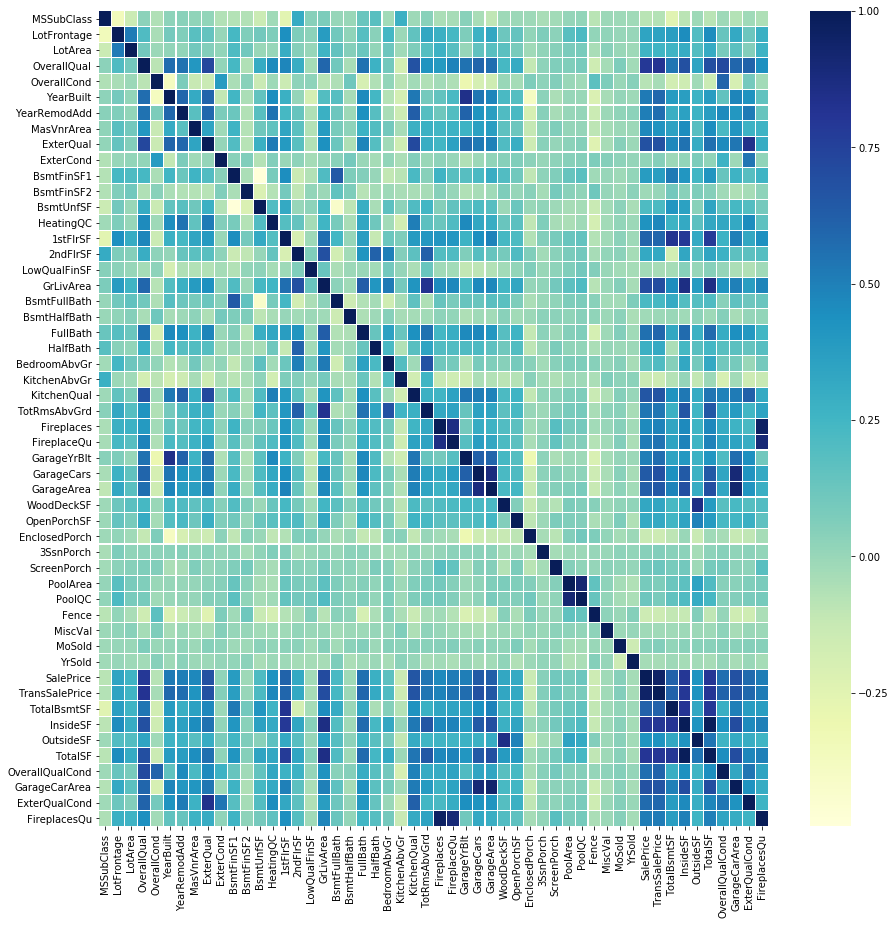

In [83]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

In [55]:
ames.to_csv('./ames.csv')

Next steps:
- Figure out label-encoder from sklearn for ordinal features (this will eventually need to be modularized like imputation script.
- Challenge assumption of aggregated/added combination fields (SF features) (same test as below)
- Test new engineered features in MLR model (and remove composite features) vs. composite features with new feature removed
- Try AIC/BIC approach in R for feature selection
- Try Lasso and feature chart to 0 for feature selection

set.seed(21)
train_test_split 75/25